# Beijing Air-Quality Time Series Project
### Exploratory Data Analysis Notebook



## by Dolci Sanders and Paul Torres

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import prettyplotlib as ppl
from prettyplotlib import brewer2mpl
from pylab import savefig 
from pylab import fill

import glob
from sklearn.model_selection import train_test_split
import pickle

# Styling Guide 

plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))


## Read in Data from Cleaning Set

In [2]:
train = pd.read_pickle('PKL/train.pkl')
test = pd.read_pickle('PKL/test.pkl')
time = pd.read_pickle('PKL/ALL/time.pkl')

In [3]:
# Set date in time full data frame additional to index 

time['Date'] = pd.to_datetime(time[['year','month','day','hour']])

Visualization PM2.5 break up based on station 
Districts with better air quality
Do any of them reach an acceptable standard? 
Trends? Worse or better
Differences in better worse? City Center? 
Suburbs better? 

### Key of Features

PM2.5 - Particulate Matter 2.5 micrometers and smaller (Target Variable)

station - Station where measurements came from (Separate time Series)

station_latitude - Latitude of Station (Visualizations Only)

station_longitude - Longitude of Station (Visualizations Only)

## Station

Our data came from 12 reporting stations. Here our data is visualized to see what stations are reporting higher levels of PM2.5 

Huairou, Changping, and Dingling have the three lowest reportings. 
Wan Shou Xin Gong, Dongsi, and Gucheng/Nongzhanguan have the four highest reportings.


In [4]:
# By Year
time_2013 = time[time['year'] == 2013]
time_2014 = time[time['year'] == 2014]
time_2015 = time[time['year'] == 2015]
time_2016 = time[time['year'] == 2016]
time_2017 = time[time['year'] == 2017]

# By Station
time_Huairou = time[time.station == 'Huairou']
time_Changping = time[time.station == 'Changping']
time_Dingling = time[time.station == 'Dingling']
time_Wanshouxigong = time[time.station == 'Wanshouxigong']
time_Dongsi = time[time.station == 'Dongsi'] 
time_Gucheng = time[time.station == 'Gucheng']
time_Nongzhanguan = time[time.station == 'Nogzhanguan']


## Levels of PM 2.5 by Year plotted by Observation Station/Site

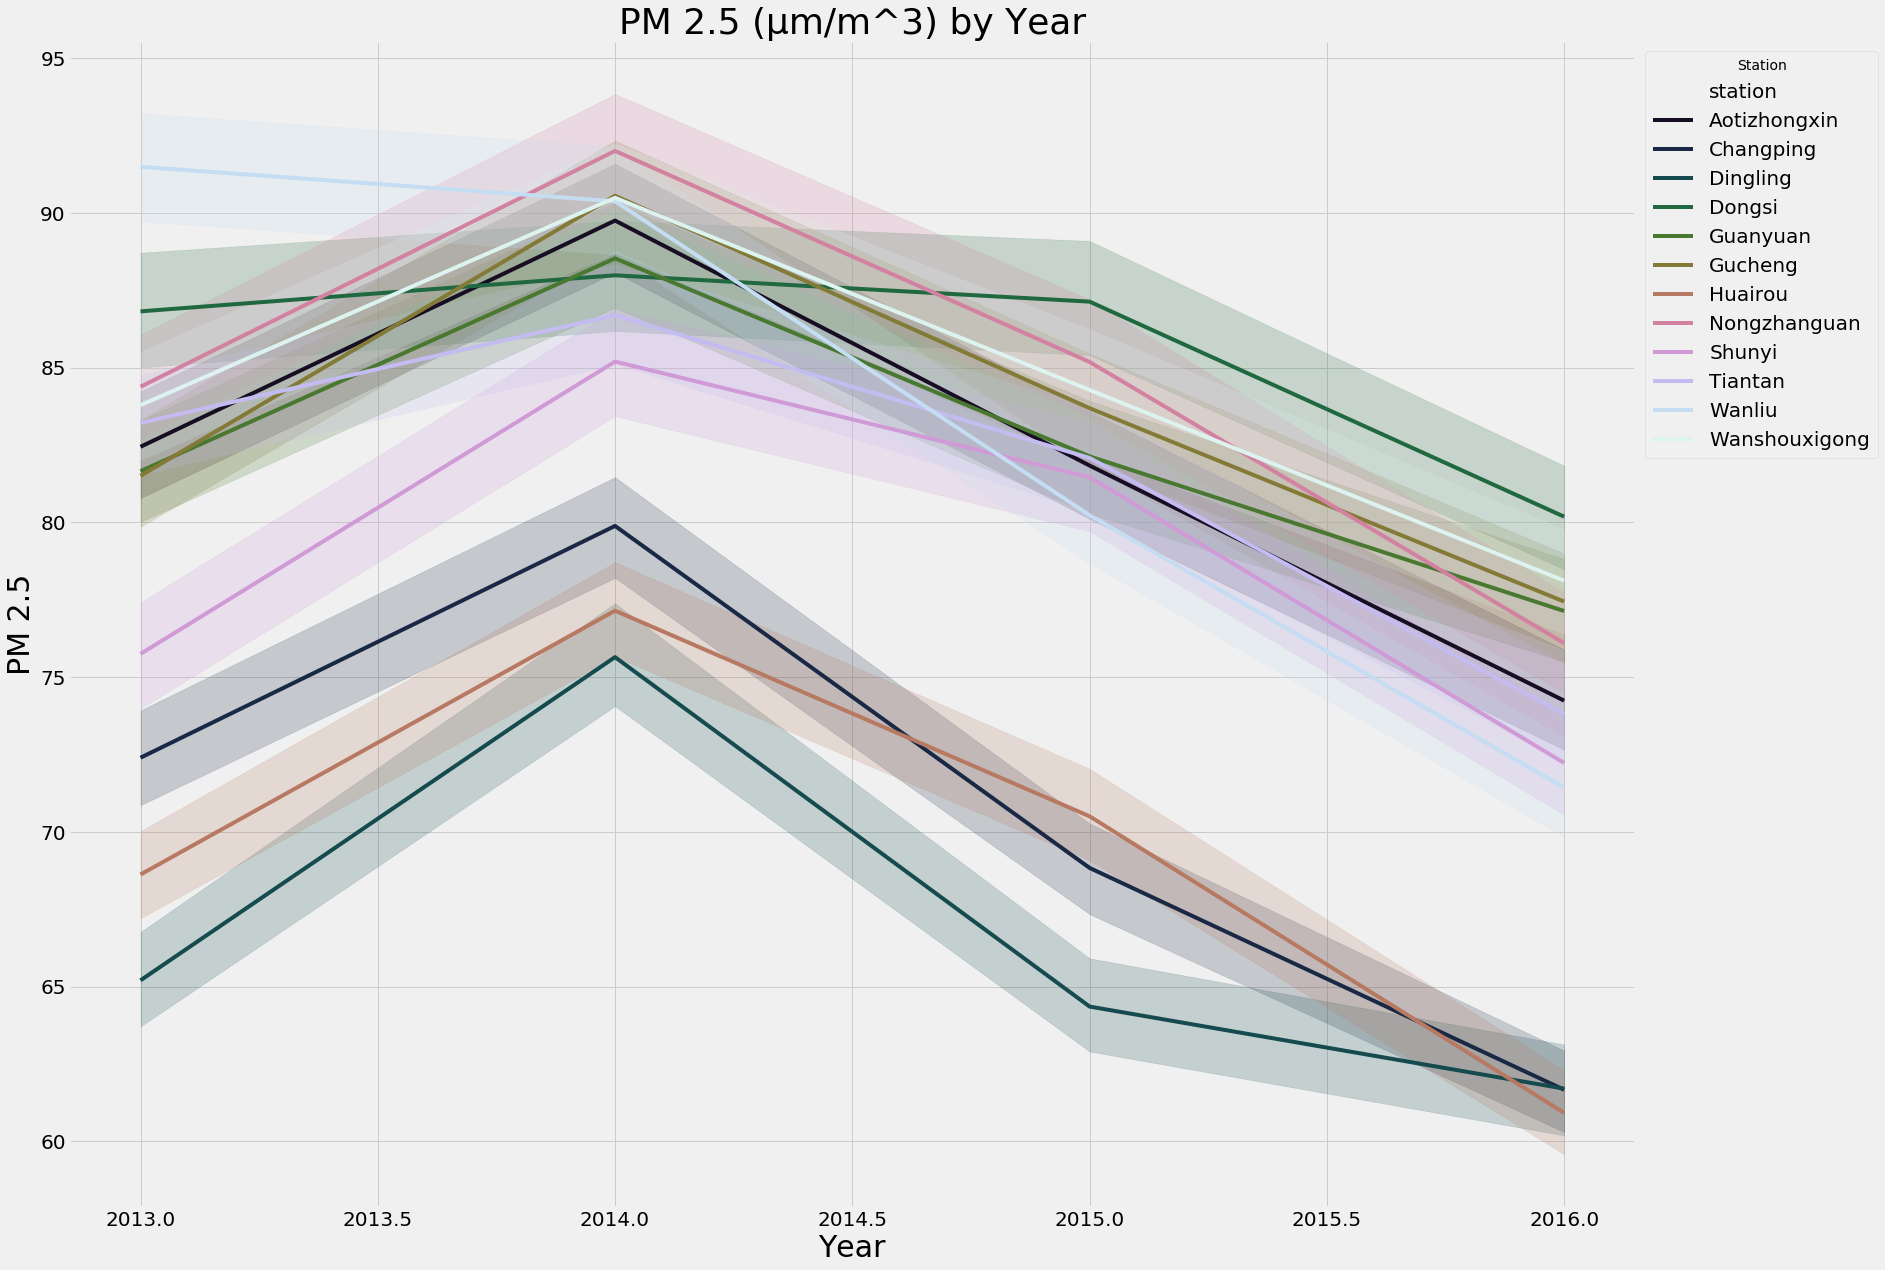

In [5]:
fig = plt.figure(figsize = (25,20))
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time, hue = 'station', dashes = False, markers = ["o", "<", ">", "^"])
 
plt.title("PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 20)
plt.show()

fig.savefig('PNG/PM25_year_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

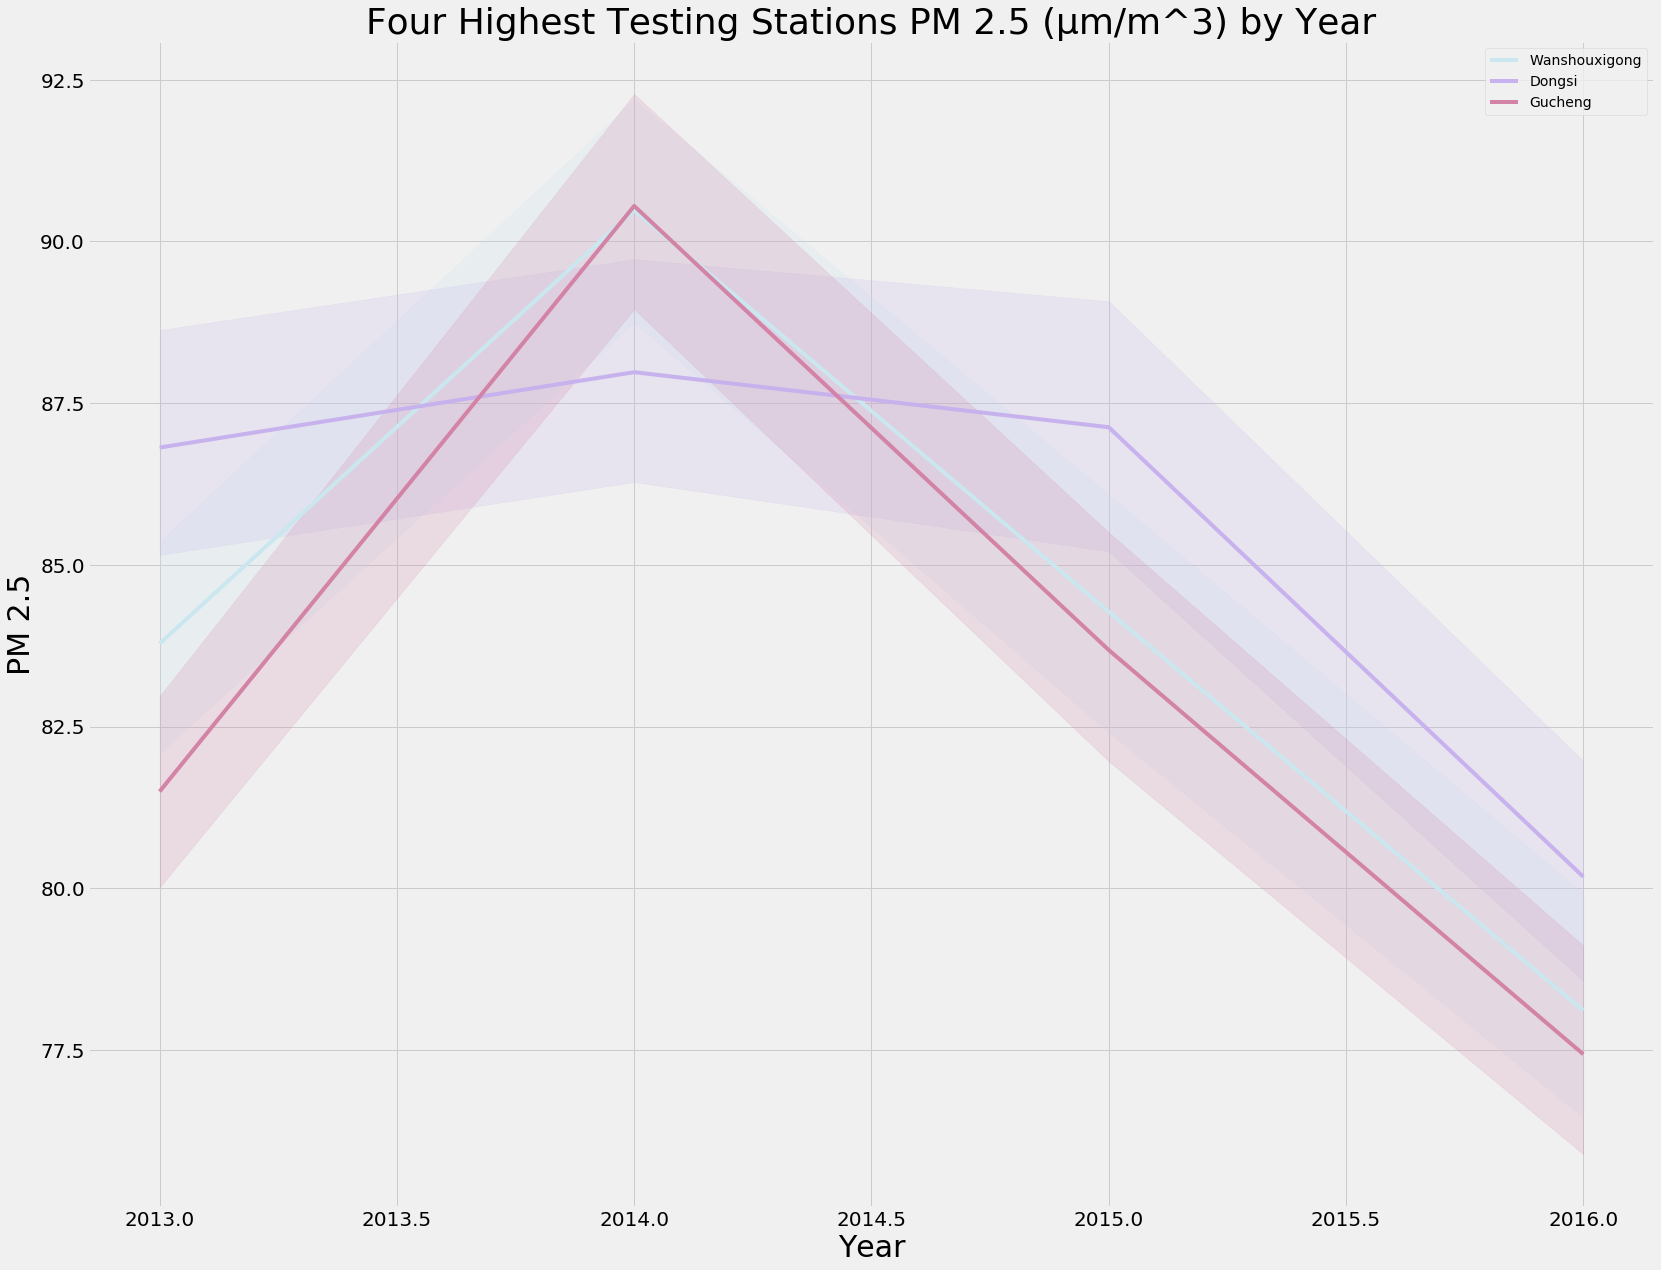

In [6]:
sns.set_palette(sns.color_palette("cubehelix_r", n_colors=7))
fig = plt.figure(figsize = (25,20))

sns.lineplot(x = "year", y = "PM2.5", data = time_Wanshouxigong, dashes = False, markers = ["o", "<", ">", "^"], label = 'Wanshouxigong')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dongsi, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dongsi')
sns.lineplot(x = "year", y = "PM2.5", data = time_Gucheng, dashes = False, markers = ["o", "<", ">", "^"], label = 'Gucheng')
sns.lineplot(x = "year", y = "PM2.5", data = time_Nongzhanguan, dashes = False, markers = ["o", "<", ">", "^"], label = 'Nongzhanguan')


plt.title("Four Highest Testing Stations PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_high_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

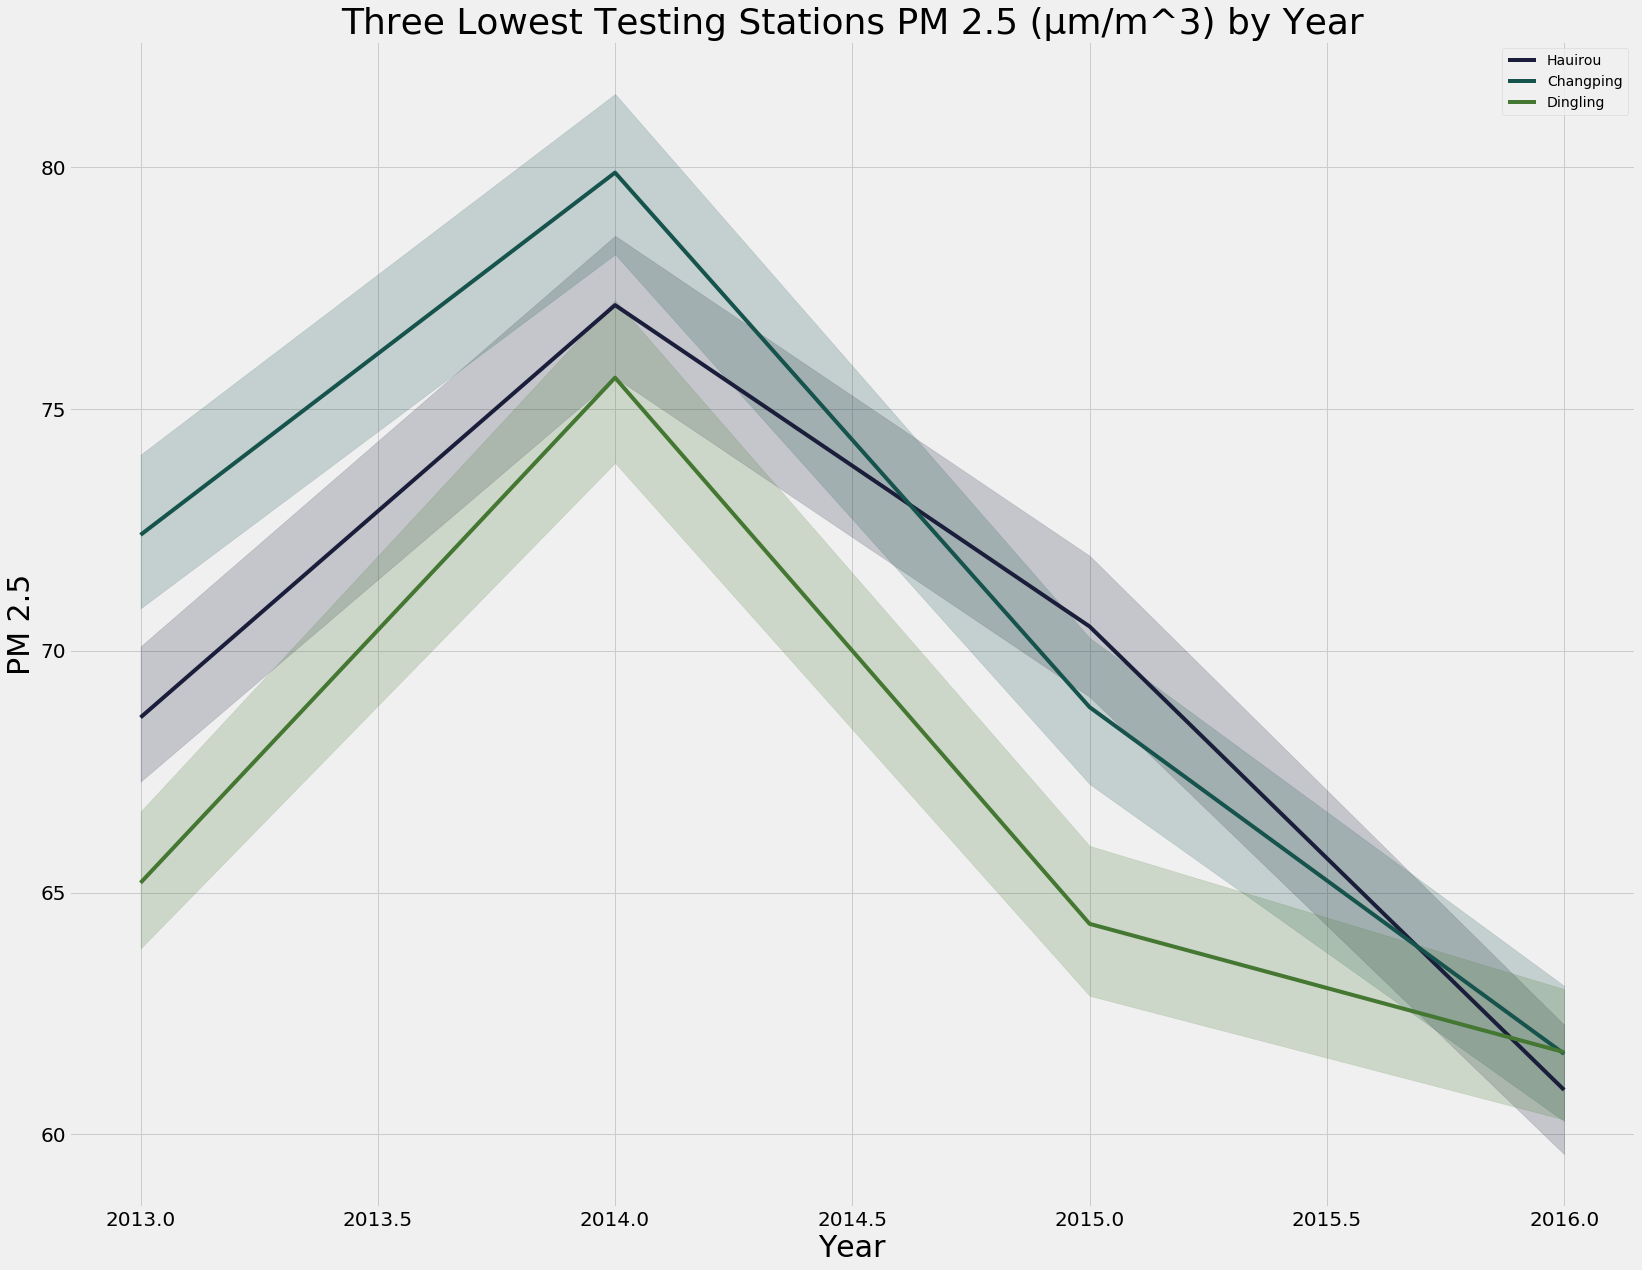

In [7]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (25,20))

# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time_Huairou, dashes = False, markers = ["o", "<", ">", "^"], label = 'Hauirou')
sns.lineplot(x = "year", y = "PM2.5", data = time_Changping, dashes = False, markers = ["o", "<", ">", "^"], label = 'Changping')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dingling, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dingling')



plt.title("Three Lowest Testing Stations PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_low_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

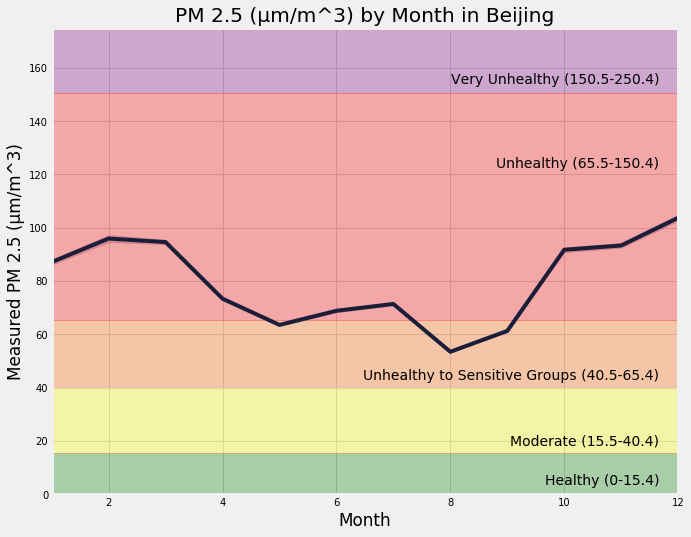

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x = 'month', y = 'PM2.5', data = time);
ax.set(xlabel='Month',
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='PM 2.5 (μm/m^3) by Month in Beijing',
       xlim=[1, 12],ylim=[0,175])

plt.xticks(size = 10)
plt.yticks(size = 10)

fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.3, edgecolor='r')

ax.annotate('Very Unhealthy (150.5-250.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.905), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Unhealthy (65.5-150.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.725), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Unhealthy to Sensitive Groups (40.5-65.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.27), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Moderate (15.5-40.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.13), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Healthy (0-15.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.045), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
fig.savefig('PNG/PM25_month_fill.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Dickey-Fuller Test and Testing for Stationarity

In [9]:
time.set_index('Date', inplace = True)

In [10]:
time_monthly = time.resample('MS').mean()
time_monthly.shape

(46, 15)

In [11]:
time_daily = time.resample('D').mean()
time_daily.shape

(1402, 15)

In [12]:
monthly_series = time_monthly['PM2.5']

roll_mean = monthly_series.rolling(window = 3).mean()
roll_std = monthly_series.rolling(window = 3).std()

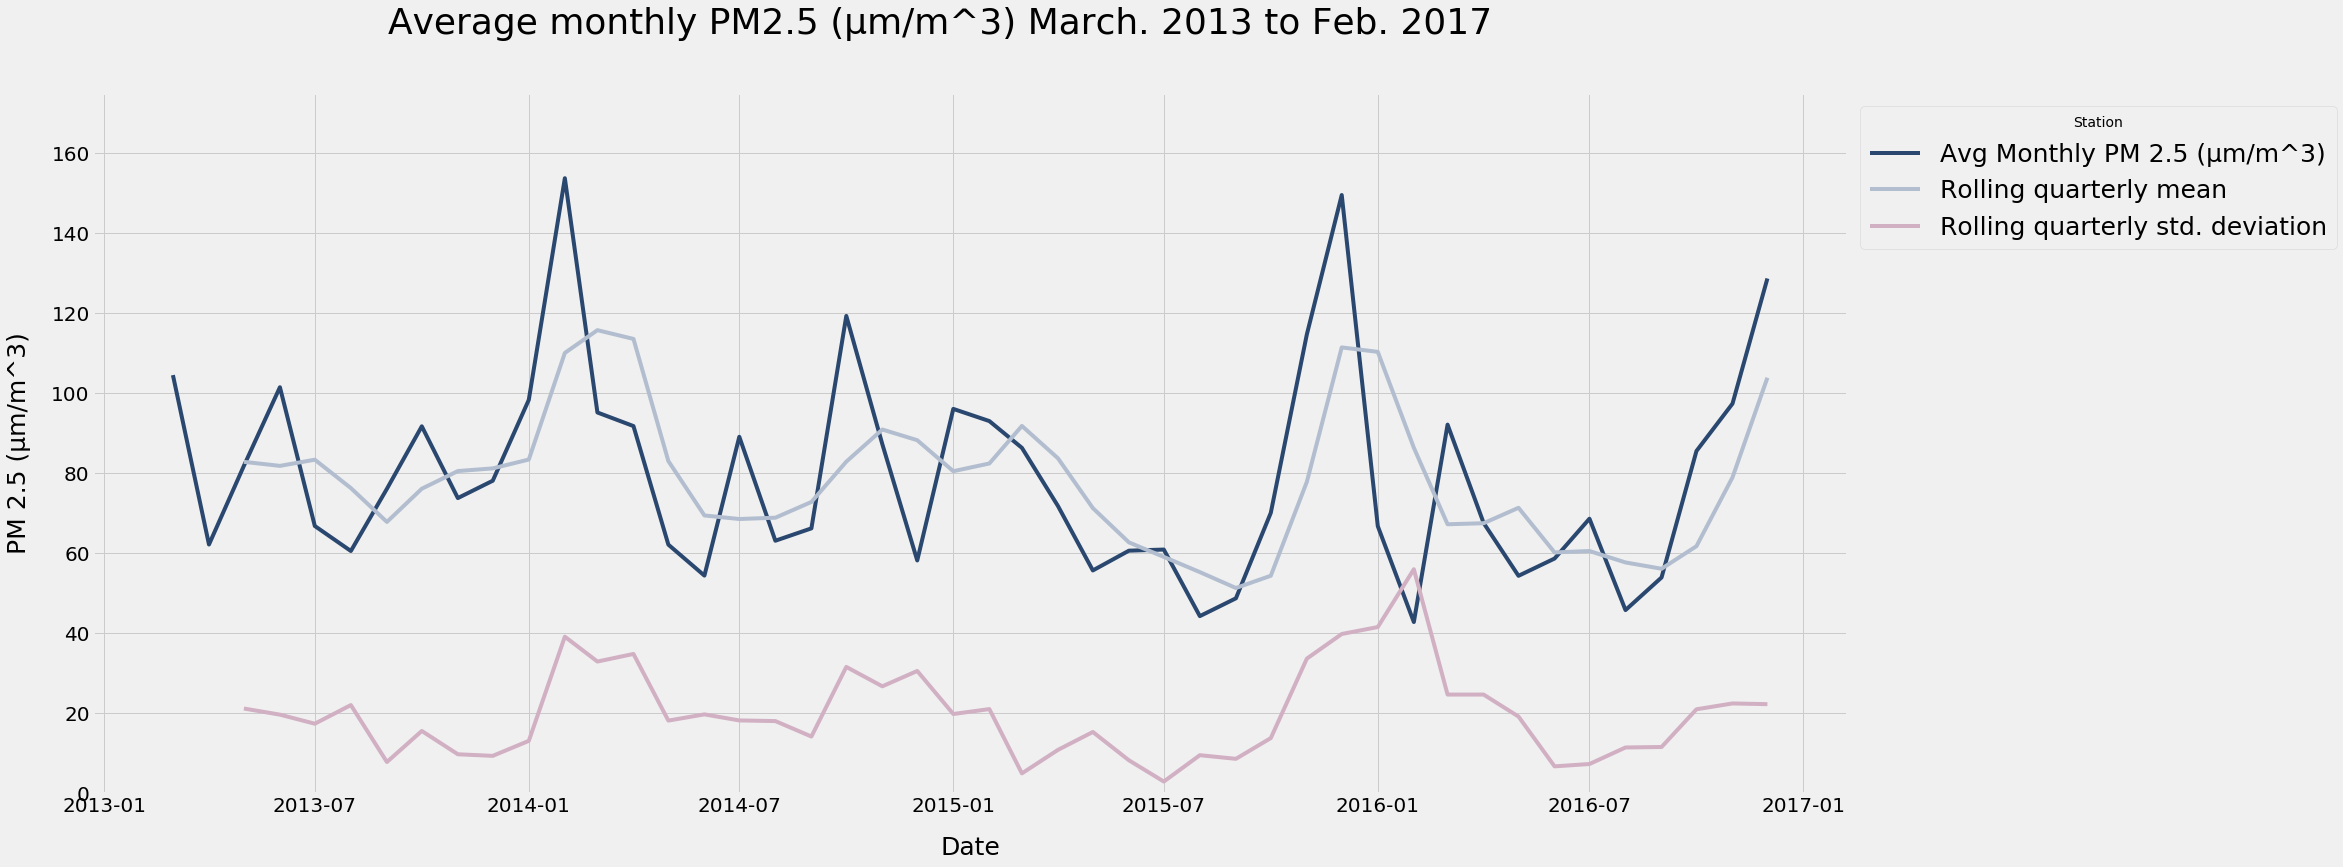

In [37]:
fig, ax = plt.subplots(figsize=(28,12))
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 30, n= 4))

ax.plot(monthly_series,label='Avg Monthly PM 2.5 (μm/m^3)')
ax.plot(roll_mean, label='Rolling quarterly mean')
ax.plot(roll_std, label='Rolling quarterly std. deviation')
ax.set_ylim(0, 175)

plt.xticks(size = 20)
plt.yticks(size = 20)

plt.xlabel('Date', fontsize = 25, labelpad=20)
plt.ylabel('PM 2.5 (μm/m^3)', fontsize = 25, labelpad=20)
plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 25)
fig.suptitle('Average monthly PM2.5 (μm/m^3) March. 2013 to Feb. 2017', fontsize = 36)

fig.savefig('PNG/series_monthly_PM25.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [15]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(monthly_series)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -4.590783
p-value                         0.000134
#Lags Used                      1.000000
Number of Observations Used    44.000000
dtype: float64


In [16]:
# Importing Adfuller library 
from statsmodels.tsa.stattools import adfuller

# Check adfuller test
def check_adfuller(time):
    # Dickey-Fuller test
    result = adfuller(time, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [17]:
check_adfuller(time['PM2.5'])

Test statistic:  -51.507882016755644
p-value:  0.0
Critical Values: {'1%': -3.4303661993603405, '5%': -2.8615471599228317, '10%': -2.566773810966036}


In [18]:
PM25_lag_1 = monthly_series.shift(periods=1)
PM25_lag_2 = monthly_series.shift(periods=2)

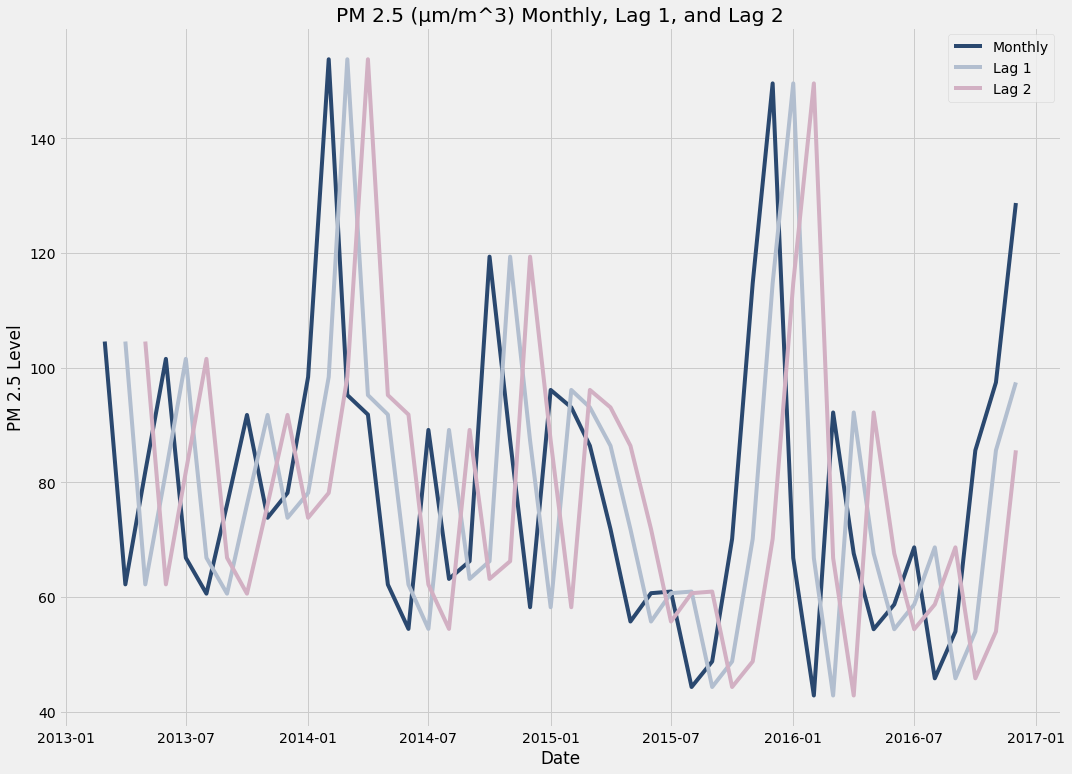

In [19]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(monthly_series, label = 'Monthly')
plt.plot(PM25_lag_1, label = 'Lag 1')
plt.plot(PM25_lag_2, label = 'Lag 2')

plt.title('PM 2.5 (μm/m^3) Monthly, Lag 1, and Lag 2')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')

plt.legend()

fig.savefig('PNG/lag1_2.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

### ACF and PACF 

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

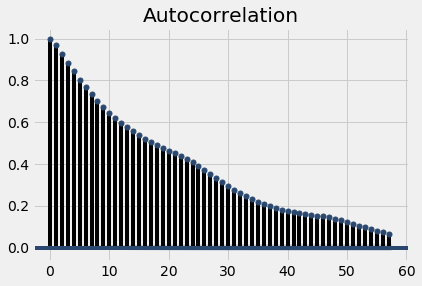

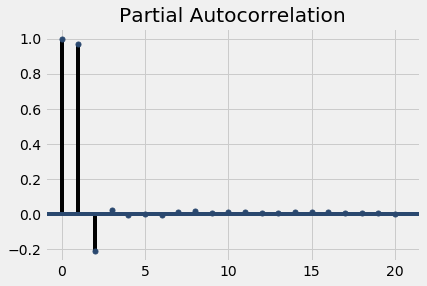

In [21]:
plot_acf(time['PM2.5'][:-1], alpha=.05);
plot_pacf(time['PM2.5'][:-1], alpha=.05, lags=20);

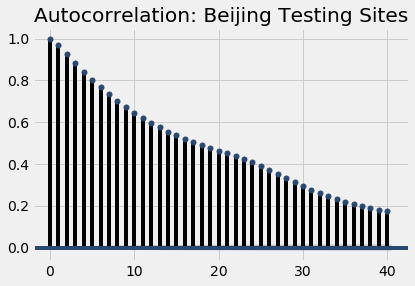

In [22]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(time['PM2.5'],title=title,lags=lags);